# Fun with Neural Nets

---

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

%matplotlib inline

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle

In [24]:
df= pd.read_csv('train (3).csv')

2. Setup X and y (feature matrix and target vector)

In [25]:
X=df.drop('label',axis=1)

In [26]:
X.shape

(42000, 784)

In [27]:
y=df['label']

3. Split X and y into train and test subsets.

4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   

In [28]:
X=X/255.
y=np_utils.to_categorical(y)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [30]:
X_train.shape

(31500, 784)

5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   

In [31]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(784,), activation='relu')) #default to relu
model.add(Dense(24,activation='relu'))
model.add(Dense(10, activation='softmax')) #inputing softmax on output layer

6. Trian your network.

In [32]:
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
          epochs = 6, 
          batch_size = 128, 
          verbose=1, 
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 31500 samples, validate on 10500 samples
Epoch 1/6
31500/31500 [==============================] - 6s 179us/step - loss: 0.3310 - acc: 0.9037 - val_loss: 0.1587 - val_acc: 0.9548
Epoch 2/6
31500/31500 [==============================] - 5s 174us/step - loss: 0.1267 - acc: 0.9630 - val_loss: 0.1251 - val_acc: 0.9621
Epoch 3/6
31500/31500 [==============================] - 5s 175us/step - loss: 0.0862 - acc: 0.9750 - val_loss: 0.0952 - val_acc: 0.9713
Epoch 4/6
31500/31500 [==============================] - 6s 176us/step - loss: 0.0545 - acc: 0.9839 - val_loss: 0.0934 - val_acc: 0.9712
Epoch 5/6
31500/31500 [==============================] - 6s 176us/step - loss: 0.0415 - acc: 0.9881 - val_loss: 0.0812 - val_acc: 0.9731
Epoch 6/6
31500/31500 [==============================] - 6s 177us/step - loss: 0.0257 - acc: 0.9930 - val_loss: 0.0844 - val_acc: 0.9750


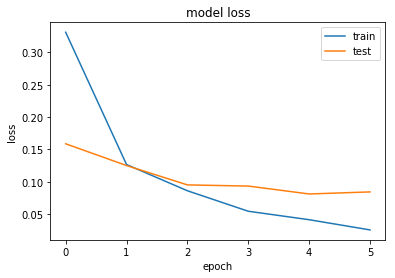

In [33]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best') ## I love this loc = 'best' command.
plt.show();

7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.

8. Load in Kaggle's `test.csv`

9. Create your predictions (these should be numbers in the range 0-9).

10. Save your predictions and submit them to Kaggle.

In [39]:
test = pd.read_csv('test_k.csv')
test = test / 255.

In [40]:
pred = model.predict_classes(test.values)

In [41]:
test['Label'] = pred
test['ImageId'] = range(1,test.shape[0] + 1)

In [42]:
test[['ImageId', 'Label']].to_csv('submission.csv', index=False)

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)